# Importing Libraries

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
from IPython.core.display import HTML 

# Import dataset 

In [7]:
dataset = pd.read_csv('C:/Users/Sudhakar/Downloads/Diabetes Project-20190628T160245Z-001/Diabetes Project/Diabetes.csv')

dataset.columns = ('Number_of_times_pregnant','Plasma_glucose_concentration','Diastolic_blood_pressure',
                   'Triceps_skin_fold_thickness','2-Hour_serum_insulin','Body_mass_index',
                   'Diabetes_pedigree_function','Age','Class_variable')

# Univariante Analysis

In [8]:
print(dataset.head(3))

   Number_of_times_pregnant  Plasma_glucose_concentration  \
0                         6                           148   
1                         1                            85   
2                         8                           183   

   Diastolic_blood_pressure  Triceps_skin_fold_thickness  \
0                        72                           35   
1                        66                           29   
2                        64                            0   

   2-Hour_serum_insulin  Body_mass_index  Diabetes_pedigree_function  Age  \
0                     0             33.6                       0.627   50   
1                     0             26.6                       0.351   31   
2                     0             23.3                       0.672   32   

  Class_variable  
0            YES  
1             NO  
2            YES  


In [9]:
print(dataset.tail(3))

     Number_of_times_pregnant  Plasma_glucose_concentration  \
765                         5                           121   
766                         1                           126   
767                         1                            93   

     Diastolic_blood_pressure  Triceps_skin_fold_thickness  \
765                        72                           23   
766                        60                            0   
767                        70                           31   

     2-Hour_serum_insulin  Body_mass_index  Diabetes_pedigree_function  Age  \
765                   112             26.2                       0.245   30   
766                     0             30.1                       0.349   47   
767                     0             30.4                       0.315   23   

    Class_variable  
765             NO  
766            YES  
767             NO  


In [10]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Number_of_times_pregnant        768 non-null int64
Plasma_glucose_concentration    768 non-null int64
Diastolic_blood_pressure        768 non-null int64
Triceps_skin_fold_thickness     768 non-null int64
2-Hour_serum_insulin            768 non-null int64
Body_mass_index                 768 non-null float64
Diabetes_pedigree_function      768 non-null float64
Age                             768 non-null int64
Class_variable                  768 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB
None


In [11]:
print(dataset.describe())

       Number_of_times_pregnant  Plasma_glucose_concentration  \
count                768.000000                    768.000000   
mean                   3.845052                    120.894531   
std                    3.369578                     31.972618   
min                    0.000000                      0.000000   
25%                    1.000000                     99.000000   
50%                    3.000000                    117.000000   
75%                    6.000000                    140.250000   
max                   17.000000                    199.000000   

       Diastolic_blood_pressure  Triceps_skin_fold_thickness  \
count                768.000000                   768.000000   
mean                  69.105469                    20.536458   
std                   19.355807                    15.952218   
min                    0.000000                     0.000000   
25%                   62.000000                     0.000000   
50%                   72.00000

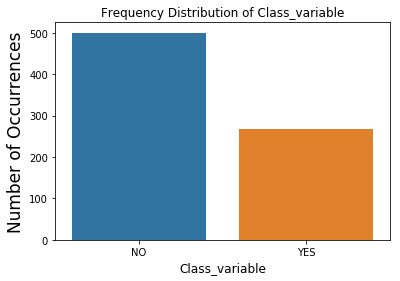

In [43]:
sns.barplot(dataset['Class_variable'].value_counts().index, dataset['Class_variable'].value_counts().values)
plt.title('Frequency Distribution of Class_variable')
plt.ylabel('Number of Occurrences', fontsize=17)
plt.xlabel('Class_variable', fontsize=12)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D8EE748>,
      dtype=object)

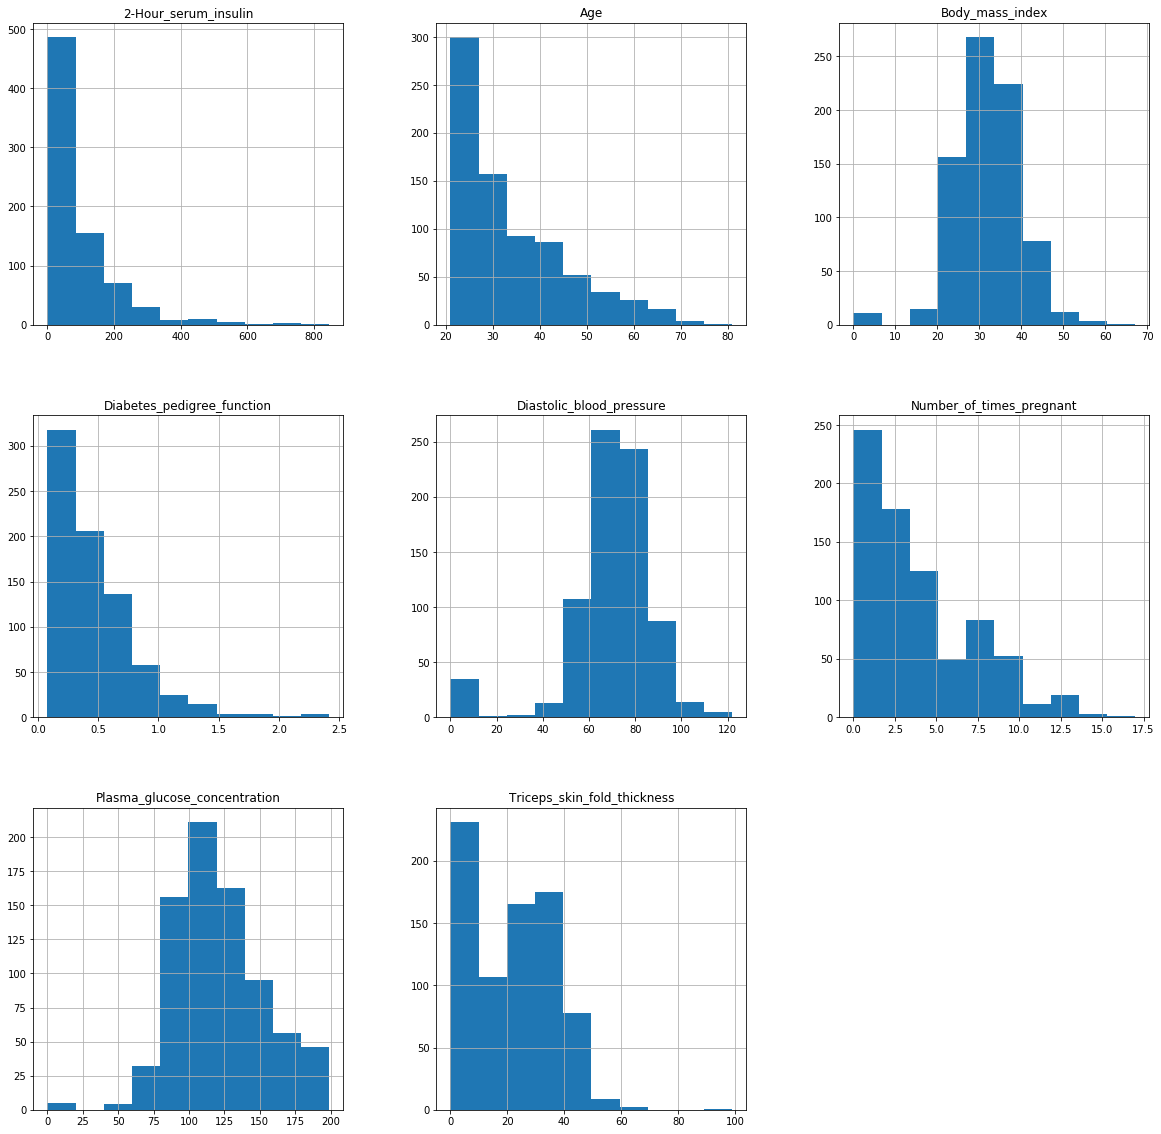

In [12]:
dataset.hist(figsize = (20,20))

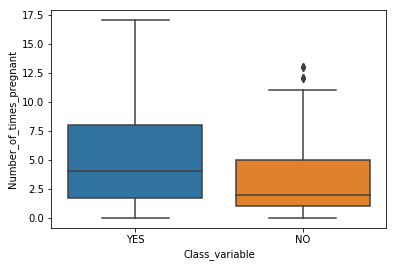

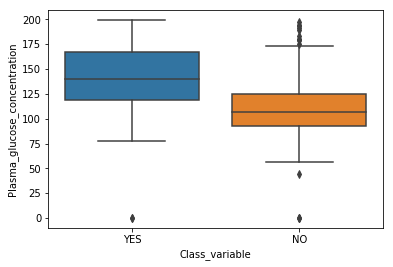

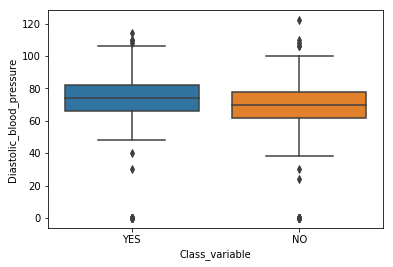

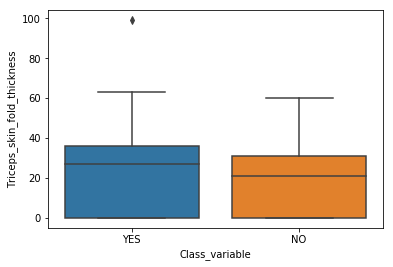

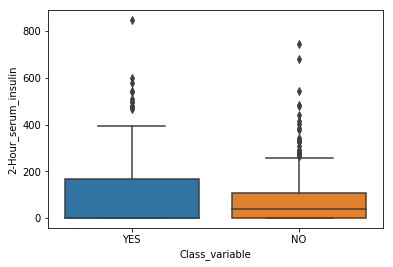

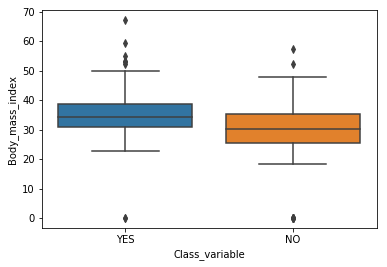

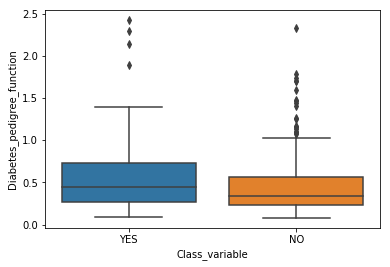

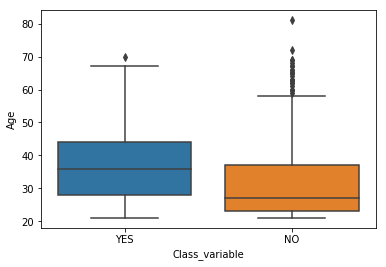

In [45]:
sns.boxplot(dataset['Class_variable'], dataset['Number_of_times_pregnant'])
plt.show()

sns.boxplot(dataset['Class_variable'], dataset['Plasma_glucose_concentration'])
plt.show()

sns.boxplot(dataset['Class_variable'], dataset['Diastolic_blood_pressure'])
plt.show()

sns.boxplot(dataset['Class_variable'], dataset['Triceps_skin_fold_thickness'])
plt.show()

sns.boxplot(dataset['Class_variable'], dataset['2-Hour_serum_insulin'])
plt.show()

sns.boxplot(dataset['Class_variable'], dataset['Body_mass_index'])
plt.show()

sns.boxplot(dataset['Class_variable'], dataset['Diabetes_pedigree_function'])
plt.show()

sns.boxplot(dataset['Class_variable'], dataset['Age'])
plt.show()


# Bivariante analysis

### Ways to Detect and Remove the Outliers

In statistics, an outlier is an observation point that is distant from other observations.


Discover outliers with visualization tools
##### Box plot & Inter Quartile Range

Wikipedia Definition,

In descriptive statistics, a box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles, hence the terms box-and-whisker plot and box-and-whisker diagram. Outliers may be plotted as individual points.
Above definition suggests, that if there is an outlier it will plotted as point in boxplot but other population will be grouped together and display as boxes. Let’s try and see it ourselves.

![Image of Yaktocat](https://www.researchgate.net/profile/Nashirah_Abu_Bakar/publication/321160284/figure/fig1/AS:562579573403648@1511140830284/Box-plot-with-outliers-detection-range.png)


Here we analysed Uni-variate outlier i.e. we used DIS column only to check the outlier. But we can do multivariate outlier analysis too. Can we do the multivariate analysis with Box plot? Well it depends, if you have a categorical values then you can use that with any continuous variable and do multivariate outlier analysis. As we do not have categorical value in our Boston Housing dataset, we might need to forget about using box plot for multivariate outlier analysis.



##### Z-Score

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

![Image of Yaktocat](https://slideplayer.com/slide/12859452/78/images/57/Outlier+detection+with+z-score.jpg)

###### Outlier removal based on Z Score

In [13]:
dataset.Class_variable[dataset.Class_variable == 'YES'] = 1
dataset.Class_variable[dataset.Class_variable == 'NO'] = 0
dataset.Class_variable = pd.to_numeric(dataset.Class_variable)

In [14]:
dataset.shape

(768, 9)

In [15]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(dataset))
print(z)

[[0.63994726 0.84832379 0.14964075 ... 0.46849198 1.4259954  1.36589591]
 [0.84488505 1.12339636 0.16054575 ... 0.36506078 0.19067191 0.73212021]
 [1.23388019 1.94372388 0.26394125 ... 0.60439732 0.10558415 1.36589591]
 ...
 [0.3429808  0.00330087 0.14964075 ... 0.68519336 0.27575966 0.73212021]
 [0.84488505 0.1597866  0.47073225 ... 0.37110101 1.17073215 1.36589591]
 [0.84488505 0.8730192  0.04624525 ... 0.47378505 0.87137393 0.73212021]]


In [16]:
print(np.where(z > 3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int64), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int64))


In [17]:
print(z[4][6])


5.484909100466951


In [18]:
dataset.shape

(768, 9)

In [19]:
dataset = dataset[(z < 3).all(axis=1)]

In [20]:
dataset.shape

(688, 9)

###### Outlier removal based on Inter Quartile Range

In [21]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Number_of_times_pregnant          5.0000
Plasma_glucose_concentration     40.0000
Diastolic_blood_pressure         16.0000
Triceps_skin_fold_thickness      32.0000
2-Hour_serum_insulin            126.0000
Body_mass_index                   8.9000
Diabetes_pedigree_function        0.3605
Age                              16.0000
Class_variable                    1.0000
dtype: float64


In [22]:
print((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR)))

     Number_of_times_pregnant  Plasma_glucose_concentration  \
0                       False                         False   
1                       False                         False   
2                       False                         False   
3                       False                         False   
5                       False                         False   
6                       False                         False   
10                      False                         False   
11                      False                         False   
12                      False                         False   
14                      False                         False   
16                      False                         False   
17                      False                         False   
18                      False                         False   
19                      False                         False   
20                      False                         F

In [23]:
dataset.shape

(688, 9)

In [24]:
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]

In [25]:
dataset.shape

(619, 9)

### Correlation:
        Degree and type of relationship between any two or more quantities (variables) in which they vary together over a period; for example, variation in the level of expenditure or savings with variation in the level of income. A positive correlation exists where the high values of one variable are associated with the high values of the other variable(s). A 'negative correlation' means association of high values of one with the low values of the other(s). Correlation can vary from +1 to -1. Values close to +1 indicate a high-degree of positive correlation, and values close to -1 indicate a high degree of negative correlation.
        Values close to zero indicate poor correlation of either kind, and 0 indicates no correlation at all. While correlation is useful in discovering possible connections between variables, it does not prove or disprove any cause-and-effect (causal) relationships between them.




![Image of Yaktocat](https://maths.nayland.school.nz/Year_13_Maths/3.9_Bivariate_data/Bivariate_images/Corr_C14.gif)

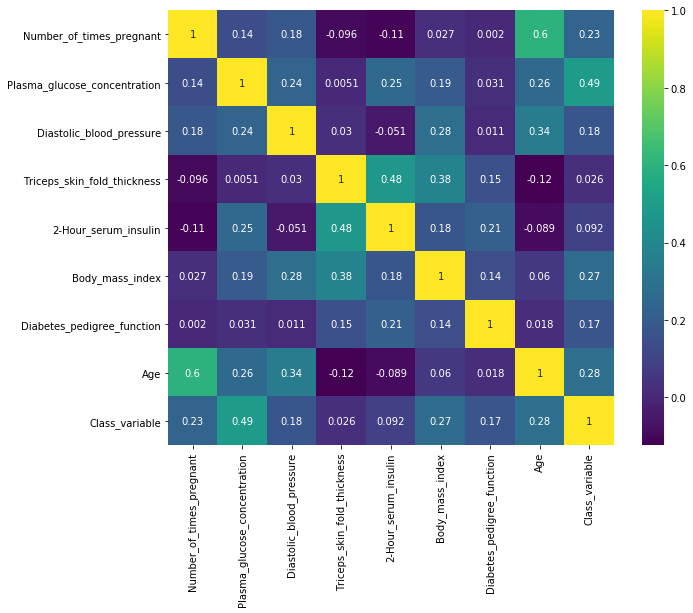

In [59]:
cm = dataset.corr()
sns.heatmap(cm, annot=True, cmap = 'viridis')
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

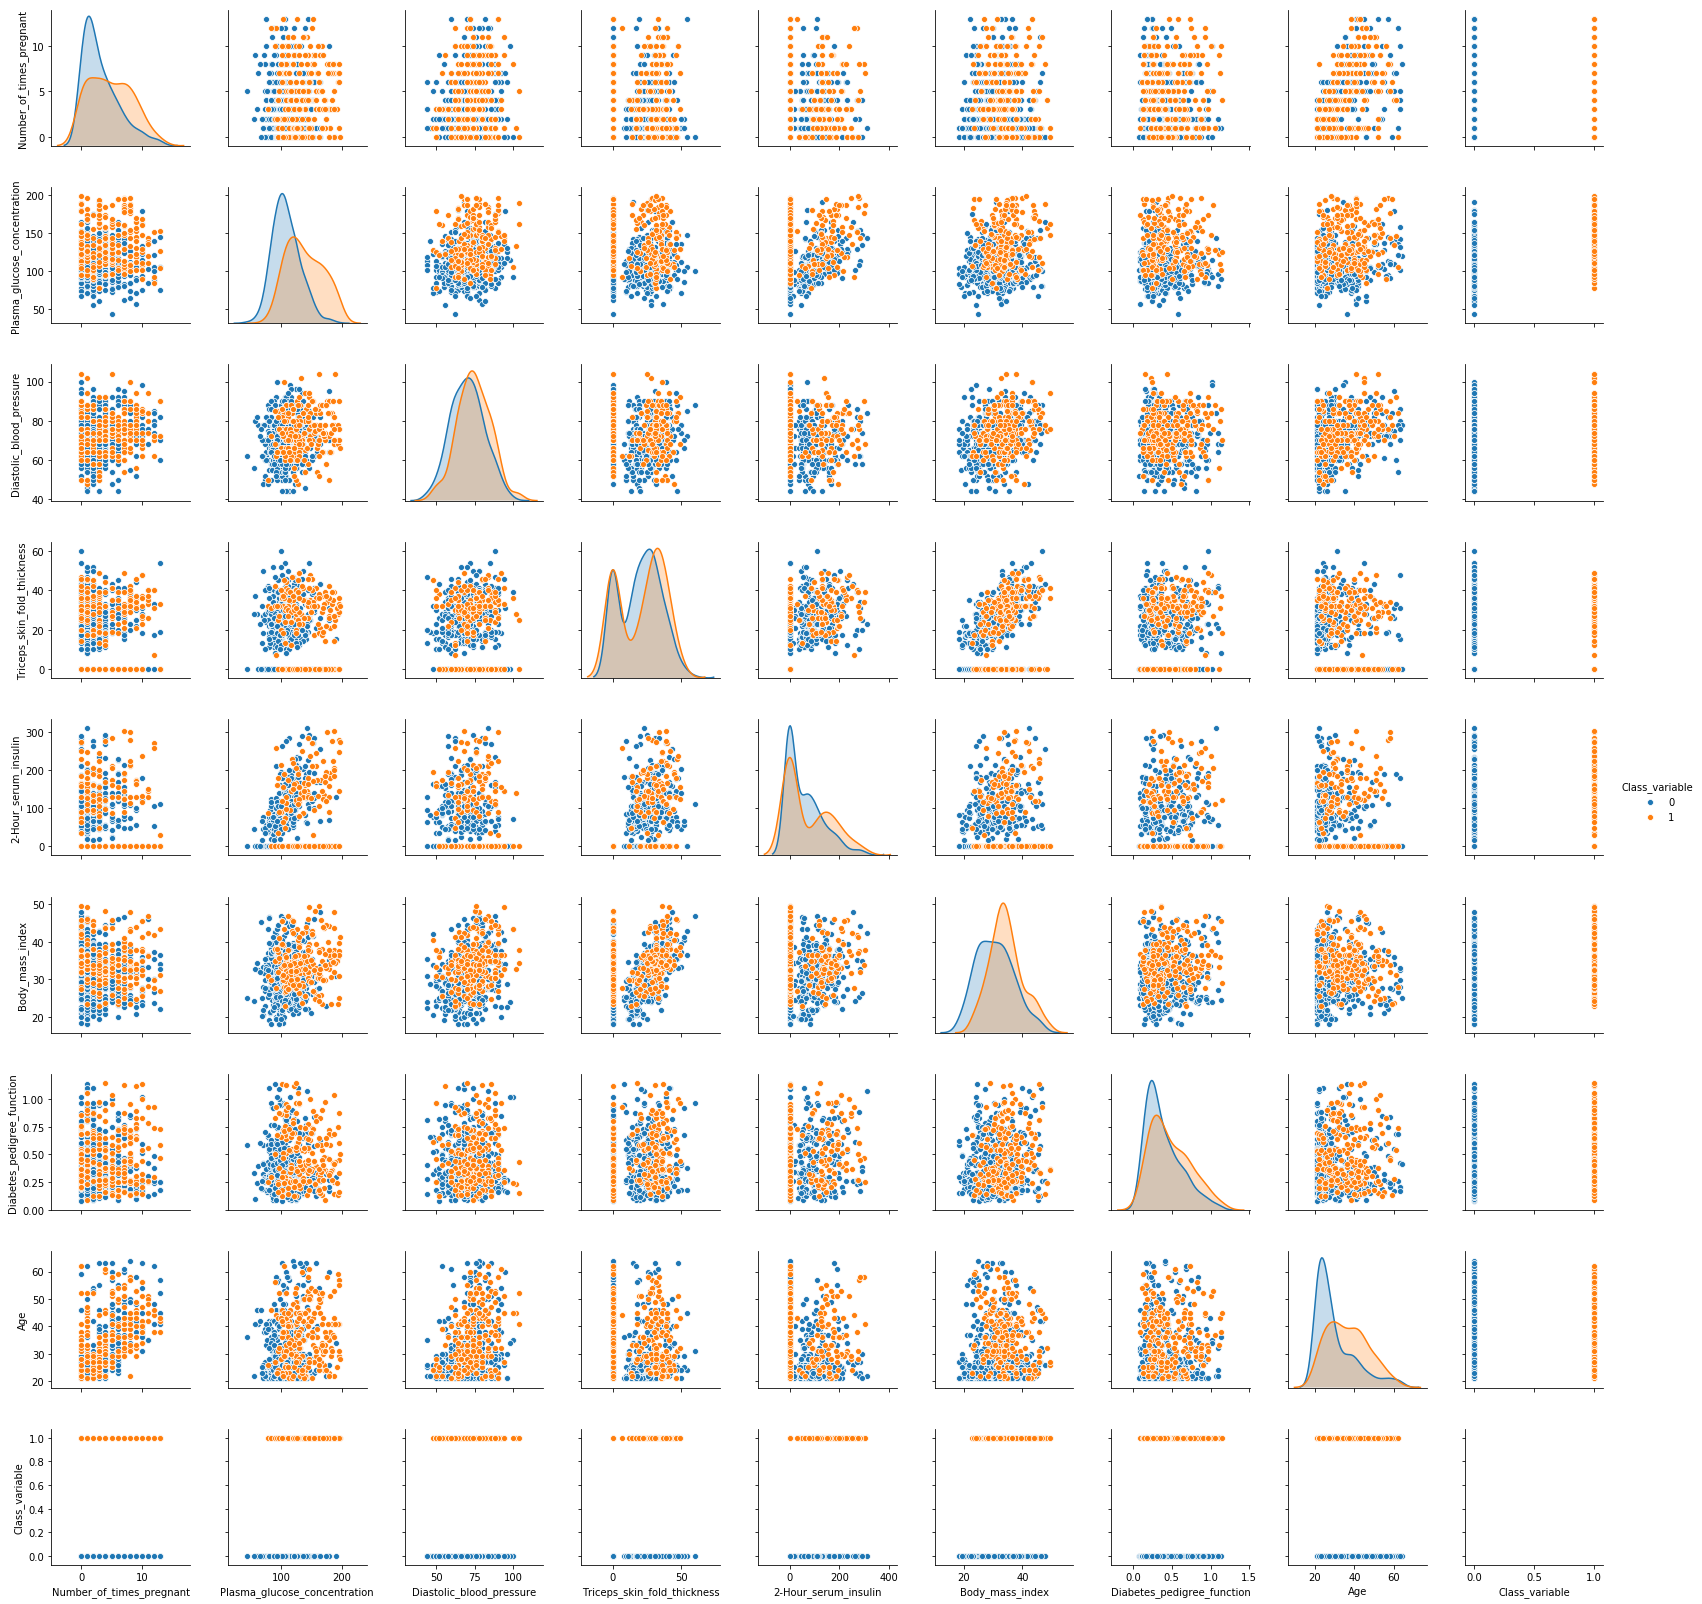

In [60]:
sns.pairplot(dataset,hue="Class_variable")
plt.show()

In [26]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7]]
y = dataset.iloc[:, 8]

# Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Logistic Regression

![Image of Yaktocat](https://i1.wp.com/dataaspirant.com/wp-content/uploads/2016/04/logisticregression.png?resize=690%2C345)
Logistic Regression was used in the biological sciences in early twentieth century. It was then used in many social science applications. Logistic Regression is used when the dependent variable(target) is categorical.

For example,

To predict whether an email is spam (1) or (0)
Whether the tumor is malignant (1) or not (0)
Consider a scenario where we need to classify whether an email is spam or not. If we use linear regression for this problem, there is a need for setting up a threshold based on which classification can be done. Say if the actual class is malignant, predicted continuous value 0.4 and the threshold value is 0.5, the data point will be classified as not malignant which can lead to serious consequence in real time.

From this example, it can be inferred that linear regression is not suitable for classification problem. Linear regression is unbounded, and this brings logistic regression into picture. Their value strictly ranges from 0 to 1.

Simple Logistic Regression

(Full Source code: https://github.com/SSaishruthi/LogisticRegression_Vectorized_Implementation/blob/master/Logistic_Regression.ipynb)

Model

Output = 0 or 1

Hypothesis => Z = WX + B

hΘ(x) = sigmoid (Z)

##### Sigmoid Function
![Image of Yaktocat](https://i0.wp.com/ucanalytics.com/blogs/wp-content/uploads/2017/09/Logit-Plot-Logistic-Regression.jpg)

If ‘Z’ goes to infinity, Y(predicted) will become 1 and if ‘Z’ goes to negative infinity, Y(predicted) will become 0.

Analysis of the hypothesis

The output from the hypothesis is the estimated probability. This is used to infer how confident can predicted value be actual value when given an input X. Consider the below example,

X = [x0 x1] = [1 IP-Address]


In [28]:
classifier = LogisticRegression()      
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Confusion Matrix in Machine Learning
In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix.
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.
It allows easy identification of confusion between classes e.g. one class is commonly mislabeled as the other. Most performance measures are computed from the confusion matrix.

This article aims at:
1. What the confusion matrix is and why you need to use it.
2. How to calculate a confusion matrix for a 2-class classification problem from scratch.
3. How to create a confusion matrix in Python.

Confusion Matrix:
A confusion matrix is a summary of prediction results on a classification problem.
The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.
The confusion matrix shows the ways in which your classification model is confused when it makes predictions.
It gives us insight not only into the errors being made by a classifier but more importantly the types of errors that are being made.

true positive (TP) : Diabetic correctly identified as diabetic
true negative (TN) : Healthy correctly identified as healthy
false positive (FP) : Healthy incorrectly identified as diabetic
false negative (FN) : Diabetic incorrectly identified as healthy
![Image of Yaktocat](https://cdn-images-1.medium.com/max/1600/1*Z54JgbS4DUwWSknhDCvNTQ.png)

![Image of Yaktocat](https://cdncontribute.geeksforgeeks.org/wp-content/uploads/Confusion_Matrix2_2.png)

In [29]:
print('Confusion Matrix is: \n',confusion_matrix(y_test, classifier.predict(X_test)))
print('Accuracy is: ',accuracy_score(y_test,classifier.predict(X_test)))

('Confusion Matrix is: \n', array([[72,  5],
       [30, 17]], dtype=int64))
('Accuracy is: ', 0.717741935483871)


## Feature Selection Techniques in Machine Learning
We all may have faced this problem of identifying the related features from a set of data and removing the irrelevant or less important features with do not contribute much to our target variable in order to achieve better accuracy for our model.

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.

Irrelevant or partially relevant features can negatively impact model performance.

Feature selection and Data cleaning should be the first and most important step of your model designing.

In this post, you will discover feature selection techniques that you can use in Machine Learning.

Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in.

Having irrelevant features in your data can decrease the accuracy of the models and make your model learn based on irrelevant features.

How to select features and what are Benefits of performing feature selection before modeling your data?

· Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.

· Improves Accuracy: Less misleading data means modeling accuracy improves.

· Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

I want to share my personal experience with this.

I prepared a model by selecting all the features and I got an accuracy of around 65% which is not pretty good for a predictive model and after doing some feature selection and feature engineering without doing any logical changes in my model code my accuracy jumped to 81% which is quite impressive

Now you know why I say feature selection should be the first and most important step of your model design.

Feature Selection Methods:

I will share 3 Feature selection techniques that are easy to use and also gives good results.

1. Univariate Selection

2. Recursive feature elimination

3. Correlation Matrix with Heatmap

In [30]:
#Univariate feature selection
select_feature = SelectKBest(chi2, k=5).fit(X_train, y_train)

selected_features_df = pd.DataFrame({'Feature':list(X_train.columns),
                                     'Scores':select_feature.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

X_train_chi = select_feature.transform(X_train)
X_test_chi = select_feature.transform(X_test)
X_train.info()
X_train_chi

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 700 to 699
Data columns (total 8 columns):
Number_of_times_pregnant        495 non-null int64
Plasma_glucose_concentration    495 non-null int64
Diastolic_blood_pressure        495 non-null int64
Triceps_skin_fold_thickness     495 non-null int64
2-Hour_serum_insulin            495 non-null int64
Body_mass_index                 495 non-null float64
Diabetes_pedigree_function      495 non-null float64
Age                             495 non-null int64
dtypes: float64(2), int64(6)
memory usage: 34.8 KB


array([[  2. , 122. , 200. ,  35.9,  26. ],
       [  0. , 165. , 255. ,  47.9,  26. ],
       [  1. ,  84. , 115. ,  36.9,  28. ],
       ...,
       [  0. ,  95. ,  92. ,  36.5,  26. ],
       [  1. ,  91. ,   0. ,  29.2,  21. ],
       [  4. , 118. ,   0. ,  44.5,  26. ]])

In [31]:
classifier.fit(X_train_chi,y_train)
print('Confusion Matrix is: \n',confusion_matrix(y_test, classifier.predict(X_test_chi)))
print('Accuracy is: ',accuracy_score(y_test,classifier.predict(X_test_chi)))

('Confusion Matrix is: \n', array([[71,  6],
       [31, 16]], dtype=int64))
('Accuracy is: ', 0.7016129032258065)


In [32]:
#Recursive feature elimination with cross validation
rfecv = RFECV(estimator=classifier, step=1, cv=5, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

('Optimal number of features :', 6)
('Best features :', Index([u'Number_of_times_pregnant', u'Plasma_glucose_concentration',
       u'Diastolic_blood_pressure', u'Body_mass_index',
       u'Diabetes_pedigree_function', u'Age'],
      dtype='object'))


In [33]:
rfecv.grid_scores_

array([0.71112843, 0.7231478 , 0.80175881, 0.80175881, 0.78759555,
       0.80388085, 0.79577901, 0.79169738])

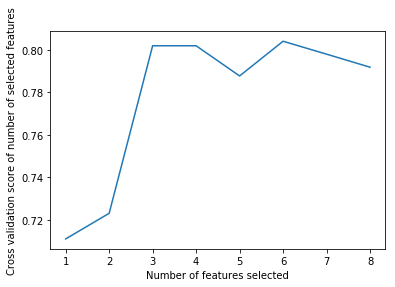

In [69]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


In [34]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)


In [35]:
classifier.fit(X_train_rfecv, y_train)
print('Confusion Matrix is: \n',confusion_matrix(y_test, classifier.predict(X_test_rfecv)))
print('Accuracy is: ',accuracy_score(y_test,classifier.predict(X_test_rfecv)))

('Confusion Matrix is: \n', array([[71,  6],
       [30, 17]], dtype=int64))
('Accuracy is: ', 0.7096774193548387)


# Decision Trees

Decision Tree Classifier, repetitively divides the working area(plot) into sub part by identifying lines. (repetitively because there may be two distant regions of same class divided by other as shown in image below).
![Image of Yaktocat](https://cdn-images-1.medium.com/max/1000/1*1CchuZc1nLM3B60zS7A1yw.png)
So when does it terminate?

Either it has divided into classes that are pure (only containing members of single class )
Some criteria of classifier attributes are met.

###### Impurity
In above division, we had clear separation of classes. But what if we had following case?

Impurity is when we have a traces of one class division into other. This can arise due to following reason

We run out of available features to divide the class upon.
We tolerate some percentage of impurity (we stop further division) for faster performance. (There is always trade off between accuracy and performance).
For example in second case we may stop our division when we have x number of fewer number of elements left. This is also known as gini impurity.

![Image of Yaktocat](https://cdn-images-1.medium.com/max/1000/1*JLcSfWDgdPFrQuDw8Cvmgw.jpeg)
Division based on some features.

###### Entropy
Entropy is degree of randomness of elements or in other words it is measure of impurity. Mathematically, it can be calculated with the help of probability of the items as:
![Image of Yaktocat](https://cdn-images-1.medium.com/max/1000/1*1XrdEhvwec6A18xuSz45SA.jpeg)

p(x) is probability of item x.
It is negative summation of probability times the log of probability of item x.

###### Information Gain
Suppose we have multiple features to divide the current working set. What feature should we select for division? Perhaps one that gives us less impurity.

Suppose we divide the classes into multiple branches as follows, the information gain at any node is defined as

Information Gain (n) =
  Entropy(x) — ([weighted average] * entropy(children for feature))
This need a bit explanation!

Suppose we have following class to work with intially

112234445

Suppose we divide them based on property: divisible by 2
![Image of Yaktocat](https://cdn-images-1.medium.com/max/1000/1*5NwW6E6ld_on7Z95Ejl48A.png)

Entropy at root level : 0.66
Entropy of left child : 0.45 , weighted value = (4/9) * 0.45 = 0.2
Entropy of right child: 0.29 , weighted value = (5/9) * 0.29 = 0.16
Information Gain = 0.66 - [0.2 + 0.16] = 0.3
Check what information gain we get if we take decision as prime number instead of divide by 2. Which one is better for this case?
Decision tree at every stage selects the one that gives best information gain. When information gain is 0 means the feature does not divide the working set at all.

In [72]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


print('Confusion Matrix is: \n',confusion_matrix(y_test, classifier.predict(X_test)))
print('Accuracy is: ',accuracy_score(y_test,classifier.predict(X_test)))

Confusion Matrix is: 
 [[61 16]
 [24 23]]
Accuracy is:  0.6774193548387096


# Random Forest

How does the algorithm work?
It works in four steps:

1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction.

![Image of Yaktocat](http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg)


Finding important features
Random forests also offers a good feature selection indicator. Scikit-learn provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction. It automatically computes the relevance score of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is 1.

This score will help you choose the most important features and drop the least important ones for model building.

Random forest uses gini importance or mean decrease in impurity (MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the overall explanatory power of the variables.


Random Forests vs Decision Trees: 

1. Random forests is a set of multiple decision trees.
2. Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
3. Decision trees are computationally faster.
4. Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.

In [36]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy',max_features=5, random_state = 0)
classifier.fit(X_train, y_train)



print('Confusion Matrix is: \n',confusion_matrix(y_test, classifier.predict(X_test)))
print('Accuracy is: ',accuracy_score(y_test,classifier.predict(X_test)))


('Confusion Matrix is: \n', array([[67, 10],
       [26, 21]], dtype=int64))
('Accuracy is: ', 0.7096774193548387)


# Support Vector Machine

“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well (look at the below snapshot).

![Image of Yaktocat](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_1.png)
Support Vectors are simply the co-ordinates of individual observation. Support Vector Machine is a frontier which best segregates the two classes (hyper-plane/ line).

How does it work?
Above, we got accustomed to the process of segregating the two classes with a hyper-plane. Now the burning question is “How can we identify the right hyper-plane?”. Don’t worry, it’s not as hard as you think!

Let’s understand:

Identify the right hyper-plane (Scenario-1): Here, we have three hyper-planes (A, B and C). Now, identify the right hyper-plane to classify star and circle.
![Image of Yaktocat](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_21.png)

SVM_2You need to remember a thumb rule to identify the right hyper-plane: “Select the hyper-plane which segregates the two classes better”. In this scenario, hyper-plane “B” has excellently performed this job.

dentify the right hyper-plane (Scenario-2): Here, we have three hyper-planes (A, B and C) and all are segregating the classes well. Now, How can we identify the right hyper-plane?
![Image of Yaktocat](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_3.png)
SVM_3Here, maximizing the distances between nearest data point (either class) and hyper-plane will help us to decide the right hyper-plane. This distance is called as Margin. Let’s look at the below snapshot:

![Image of Yaktocat](https://www.analyticsvidhya.com/wp-content/uploads/2015/10/SVM_4.png)
Above, you can see that the margin for hyper-plane C is high as compared to both A and B. Hence, we name the right hyper-plane as C. Another lightning reason for selecting the hyper-plane with higher margin is robustness. If we select a hyper-plane having low margin then there is high chance of miss-classification.

In [37]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


print('Confusion Matrix is: \n',confusion_matrix(y_test, classifier.predict(X_test)))
print('Accuracy is: ',accuracy_score(y_test,classifier.predict(X_test)))

('Confusion Matrix is: \n', array([[77,  0],
       [47,  0]], dtype=int64))
('Accuracy is: ', 0.6209677419354839)


# Supervised Machine Learning vs Unsupervised Machine Learning

###### Supervised Machine Learning
The majority of practical machine learning uses supervised learning.

Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

It is called supervised learning because the process of an algorithm learning from the training dataset can be thought of as a teacher supervising the learning process. We know the correct answers, the algorithm iteratively makes predictions on the training data and is corrected by the teacher. Learning stops when the algorithm achieves an acceptable level of performance.

Supervised learning problems can be further grouped into regression and classification problems.

Classification: A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.
Regression: A regression problem is when the output variable is a real value, such as “dollars” or “weight”.
Some common types of problems built on top of classification and regression include recommendation and time series prediction respectively.

Some popular examples of supervised machine learning algorithms are:

Linear regression for regression problems.
Random forest for classification and regression problems.
Support vector machines for classification problems.

###### Unsupervised Machine Learning
Unsupervised learning is where you only have input data (X) and no corresponding output variables.

The goal for unsupervised learning is to model the underlying structure or distribution in the data in order to learn more about the data.

These are called unsupervised learning because unlike supervised learning above there is no correct answers and there is no teacher. Algorithms are left to their own devises to discover and present the interesting structure in the data.

Unsupervised learning problems can be further grouped into clustering and association problems.

Clustering: A clustering problem is where you want to discover the inherent groupings in the data, such as grouping customers by purchasing behavior.
Association:  An association rule learning problem is where you want to discover rules that describe large portions of your data, such as people that buy X also tend to buy Y.
Some popular examples of unsupervised learning algorithms are:

k-means for clustering problems.
Apriori algorithm for association rule learning problems.

# Clustering

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.

Let’s understand this with an example. Suppose, you are the head of a rental store and wish to understand preferences of your costumers to scale up your business. Is it possible for you to look at details of each costumer and devise a unique business strategy for each one of them? Definitely not. But, what you can do is to cluster all of your costumers into say 10 groups based on their purchasing habits and use a separate strategy for costumers in each of these 10 groups. And this is what we call clustering.

Now, that we understand what is clustering. Let’s take a look at the types of clustering.

K Means Clustering
K means is an iterative clustering algorithm that aims to find local maxima in each iteration. This algorithm works in these 5 steps :

Specify the desired number of clusters K : Let us choose k=2 for these 5 data points in 2-D space.
![Image of Yaktocat](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering-2.png)

Randomly assign each data point to a cluster : Let’s assign three points in cluster 1 shown using red color and two points in cluster 2 shown using grey color.
![Image of Yaktocat](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering-2-1.png)

Compute cluster centroids : The centroid of data points in the red cluster is shown using red cross and those in grey cluster using grey cross.
![Image of Yaktocat](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering-3.png)

Re-assign each point to the closest cluster centroid : Note that only the data point at the bottom is assigned to the red cluster even though its closer to the centroid of grey cluster. Thus, we assign that data point into grey cluster
![Image of Yaktocat](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering-4.png)

Re-compute cluster centroids : Now, re-computing the centroids for both the clusters.
![Image of Yaktocat](https://www.analyticsvidhya.com/wp-content/uploads/2016/11/clustering-5.png)
Repeat steps 4 and 5 until no improvements are possible : Similarly, we’ll repeat the 4th and 5th steps until we’ll reach global optima. When there will be no further switching of data points between two clusters for two successive repeats. It will mark the termination of the algorithm if not explicitly mentioned.

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X.astype(float))[i,]
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y.iloc[i]:
        correct += 1

print('Accuracy is: ',correct/len(X))

('Accuracy is: ', 0)
